<a href="https://colab.research.google.com/github/fellipe753/Estudo_B3/blob/main/Trabalho_6_B3_matplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo Ações na B3 (Bovespa)

O código abaixo apresenta uma tratativa das informações de cotação de ações, onde o objetivo central é verificar a correlação entre as ações que compõe uma carteira e a sua dependência em relação ao índice da bolsa, no caso do Brasil a B3.

O código pode ser adaptado para uma bolsa americana, bastando alterar suas ações e bolsa que compõe sua carteira.


Caso prefira a versão com gráficos interativos, favor acessar o link abaixo. Esta versão não performa bem no github.

[Colab Interativo](https://colab.research.google.com/drive/1fOzP0_rPaCmk6CfV9Ef2CFgNIxzP-4qh?usp=sharing)



A ideia surgiu após assistir a aula do Eduardo Moreira.

[Video Eduardo](https://www.youtube.com/watch?v=-fI08EhqWJg&ab_channel=EduardoMoreira)

Além disso, foi utilizado o stackoverflow e os sites abaixo para entender melhor os códigos e variáveis utilizadas.



    https://quantbrasil.com.br/entenda-o-que-e-o-beta-e-aprenda-a-calcula-lo-utilizando-python
    https://tc.com.br/tc-school/quant-investimentos/python-calcular-beta
    https://medium.com/data-hackers/implementando-regress%C3%A3o-linear-simples-em-python-91df53b920a8

Código construído por: 

    Fellipe Oliveira. 
    Contato: fellipe3000@yahoo.com.br
[Linkedin](https://www.linkedin.com/in/fellipe-oliveira/)

[Portfolio Github](https://github.com/fellipe753/portfolio) 


---



---

Para navegar nos tópicos use o índice a esquerda.
Caso queira ir direto aos resultados, pode clicar em resultados ou ir no item 8.

# 1 - Import Bibliotecas

Import das bibliotecas utilizadas no código




In [1]:
#@title
%reset -f
!pip install yfinance

     |████████████████████████████████| 63 kB 933 kB/s 
     |████████████████████████████████| 6.4 MB 10.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
#@title
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date
import datetime
import matplotlib.pyplot as plt
import seaborn as sn # 
#from google.colab import drive descomentar quando for puxar direto do meu drive

# 2 - Determinação do Período e Carteira

## a) Período de análise

Caso queira alterar o período, basta modificar o formulário.

Neste estudo estou usando um período de 365 dias.

In [3]:
#@title Escolha do Período de Análise: {run: "auto"}
start_date = '2020-12-20' #@param {type:"date"}
end_date = '2021-12-20' #@param {type:"date"}

## b) Escolha da Carteira

Aqui é possível escolher as ações que compõe sua carteira e qual a bolsa de origem delas.

A B3 é determinada pelo código ^BVSP.

Caso opte por uma bolsa estrangeira, dos EUA por exemplo, basta colocar as ações e a bolsa. Os nomes podem ser encontrados pesquisando o nome da ação/bolsa + yahoofinance no google.

    Obs: É aconselhável utilizar até 10 ações para estudo para não ficar complicado as análises gráficas. 
    Entretanto, pode ser utilizado a quantidade que achar mais viável.

In [4]:
#@markdown ### Digite a sigla da Bolsa de Valores:
bolsa ='^BVSP' #@param {type:"string"}

#@markdown ### Digite as siglas das ações serparadas por vírgula:
my_stocks_list = 'ALSO3,BBAS3,EGIE3,ENBR3,HGTX3,LREN3,MDIA3,MGLU3,MOVI3,WEGE3' #@param {type:"string"}





In [5]:
#@title
my_stocks_list = my_stocks_list.split(',')
my_stocks_list = [i+".SA" for i in my_stocks_list] # as ações vem por padrão com o sufixo .SA
my_stocks_list.insert(0,bolsa)

## c) Download das Cotações

Observar se todas as ações serão carregadas. As vezes por algum erro de comunicação, uma ação pode não ser carregada, sendo necessário repetir o download.

Ex:
Failed download:
- HGTX3.SA: No data found, symbol may be delisted

In [6]:
#@title
stocks = yf.download(my_stocks_list,start_date,end_date)# ['Adj Close']  #observar se alguma ação falha ao ser carregada
stocks.head()

[*********************100%***********************]  11 of 11 completed

1 Failed download:
- HGTX3.SA: No data found, symbol may be delisted


Adj Close                        ...   Volume                   
             ALSO3.SA   BBAS3.SA   EGIE3.SA  ... MOVI3.SA WEGE3.SA     ^BVSP
Date                                         ...                            
2020-12-21  28.647301  35.076843  40.425686  ...  1694400  8072000  10347100
2020-12-22  27.804443  35.540943  40.202648  ...  2096100  5199800   6947900
2020-12-23  28.002762  36.125710  40.574375  ...  1983400  4806600   6483300
2020-12-28  29.103437  36.524834  41.670982  ...  1209600  6838800   7171700
2020-12-29  28.736544  36.311348  41.345722  ...  1350400  6130200   6769700

[5 rows x 66 columns]

## d) Filtrando o dataframe apenas pela cotação de fechamento (Adj Close)

Aqui filtramos apenas pelos valores de fechamento diário da ação.

Por padrão, as ações vem com o código padrão acompanhadas do ".SA". Eu optei por remover essa segunda parte após o download.

In [7]:
#@title
stocks_adj = stocks['Adj Close']
stocks_adj.columns = [i.replace('.SA','') for i in stocks_adj.columns]
print(f'Temos {len(stocks_adj.columns)-1} ações na carteira negociadas na {bolsa}.\n')
stocks_adj.head()

Temos 10 ações na carteira negociadas na ^BVSP.



,ALSO3,BBAS3,EGIE3,ENBR3,HGTX3,LREN3,MDIA3,MGLU3,MOVI3,WEGE3,^BVSP
Date,,,,,,,,,,,
2020-12-21,28.647301,35.076843,40.425686,17.809731,NaN,42.964520,33.579262,24.955891,19.031818,35.596092,116016.0
2020-12-22,27.804443,35.540943,40.202648,17.818863,NaN,42.192238,33.412685,25.115610,18.808258,35.996490,116348.0
2020-12-23,28.002762,36.125710,40.574375,17.846264,NaN,42.739681,33.540066,24.925945,19.410900,35.897625,117857.0
2020-12-28,29.103437,36.524834,41.670982,18.111124,NaN,42.984066,33.596897,25.205452,19.478943,37.321270,119051.0
2020-12-29,28.736544,36.311348,41.345722,18.111124,NaN,43.140484,33.596897,25.235399,19.615023,37.148262,119475.0


# 3 - Tratamento da qualidade dos dados

## a) Avaliando qualidade dos Dados

Estas funções tratam ações que possuem um percentual x de amostras nulas.

Por exemplo: se você pega um intervalo muito longo e na sua carteira tem uma ação mais recente, boa parte das informações dela irão vir zeradas. Desta forma, é possível você escolher um percentual de nulos, e caso ele seja atingido essa ação será removida da análise.

Em caso de alguma ação não ter sido carregada da maneira correta, ela provavelmente será excluída aqui.

Neste exemplo eu uso o valor 5%, conforme código abaixo:

    stocks_adj = stocks_adj[good_stocks(stocks_adj,5)]

In [8]:
def data_quality(df):
  # retorna a avaliaçao das colunas quanto ao numero de valores nulos
  
  df_evaluation = pd.DataFrame(df.isna().sum())
  df_evaluation.columns = ['NullValues']
  df_evaluation['TotalRows'] = len(df)
  df_evaluation['NullValuesPerc'] = (df_evaluation['NullValues']/df_evaluation['TotalRows'])*100
  return df_evaluation

In [9]:
def good_stocks(df,threshold):
  # retorna uma lista de ações dado um número maximo de valores nulos
  
  df_evaluation = data_quality(df)
  data_evaluation = df_evaluation[df_evaluation["NullValuesPerc"]<threshold]
  data_evaluation = list(data_evaluation.index)
  print(f'Do total de {len(df.columns)-1} ações, temos {len(data_evaluation)-1} ações com menos de {threshold}% de valores nulos')
  return data_evaluation

In [10]:
# selecionar na stocks_adj apenas acoes de qualidade (com menos de 5% de valores nulos)
stocks_adj = stocks_adj[good_stocks(stocks_adj,5)]

Do total de 10 ações, temos 9 ações com menos de 5% de valores nulos


## b) Removendo linhas nulas 

Como a biblioteca não é apenas de ações nacionais, ela pode coletar alguns dias que foram feriados em alguns países e em outros não. Aqui removo linhas inteiras onde não houve coletas.

In [11]:
print(f'Temos {len(stocks_adj.index)} linhas antes da remoção das linhas nulas.')
stocks_adj.dropna(inplace=True)
print(f'Temos {len(stocks_adj.index)} linhas após remoção das linhas nulas.')

Temos 245 linhas antes da remoção das linhas nulas.
Temos 245 linhas após remoção das linhas nulas.


#4 - Normalização das Ações

## a) Normalização

Como o índice opera na casa das centenas de milhares de pontos e as ações em algumas dezenas de reais, aqui é feita uma normalização pelo primeiro dia de ocorrência das informações.

    fórmula: Aₓ=(Aₓ/A₀)

In [12]:
stocks_normal = stocks_adj.div(stocks_adj.iloc[0])
# removendo primeira linha que será 1 para todas ações
stocks_normal.drop(index=stocks_normal.index[0], axis=0, inplace=True)
stocks_normal

,ALSO3,BBAS3,EGIE3,ENBR3,LREN3,MDIA3,MGLU3,MOVI3,WEGE3,^BVSP
Date,,,,,,,,,,
2020-12-22,0.970578,1.013231,0.994483,1.000513,0.982025,0.995039,1.006400,0.988253,1.011248,1.002862
2020-12-23,0.977501,1.029902,1.003678,1.002051,0.994767,0.998833,0.998800,1.019918,1.008471,1.015869
2020-12-28,1.015923,1.041281,1.030805,1.016923,1.000455,1.000525,1.010000,1.023494,1.048465,1.026160
2020-12-29,1.003115,1.035194,1.022759,1.016923,1.004096,1.000525,1.011200,1.030644,1.043605,1.029815
2020-12-30,1.009692,1.026726,1.010115,1.007692,0.990671,1.007327,0.999040,1.054648,1.051798,1.028358
...,...,...,...,...,...,...,...,...,...,...
2021-12-13,0.771451,0.913851,0.975980,1.152041,0.643899,0.817393,0.242428,0.953425,0.999191,0.925588
2021-12-14,0.742478,0.913993,0.964870,1.145559,0.612410,0.805503,0.230006,0.948734,0.990491,0.920218
2021-12-15,0.750507,0.898313,0.972277,1.136918,0.624913,0.800747,0.247236,0.944042,0.999472,0.926002


## b) Gráfico Ações Normalizadas

Na data do estudo a maioria das ações apresentam variação negativa, com exceção da ENBR3.

Destaque para a MGLU3 que chegou próximo aos 20% do seu valor inicial.

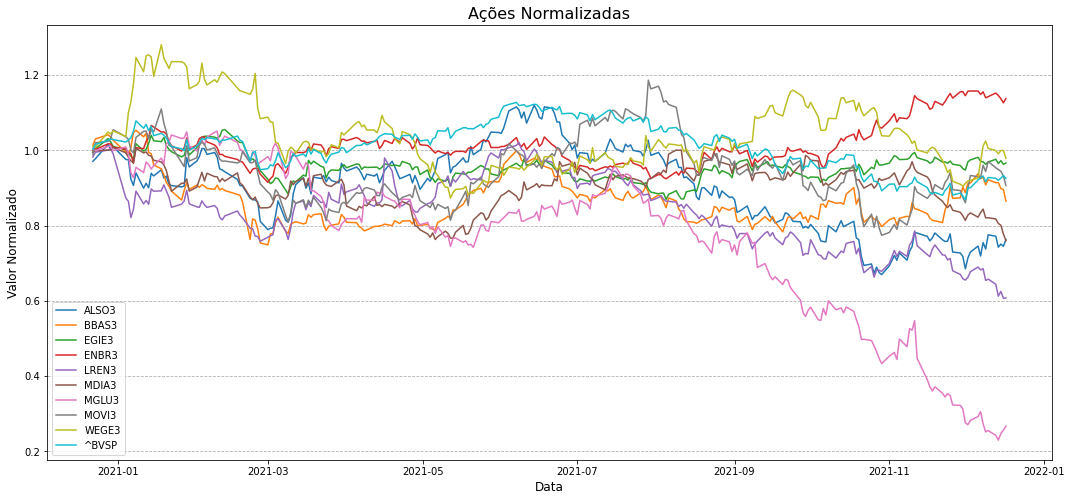

In [34]:
#@title
plt.figure(figsize=(18,8))
plt.plot(stocks_normal.index, stocks_normal)
plt.title('Ações Normalizadas', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor Normalizado', fontsize=12)
plt.grid(linestyle='--', axis='y')
plt.legend(stocks_normal.columns,loc = "lower left",  prop={"size":10})
plt.show()

# 5 - Variação diária das ações

## a) Cálculo das variações diárias de cada ação no decorrer do período estudado

    fórmula: (Dia atual - Dia anterior)/Dia Anterior

Caso queira em percentual, basta multiplicar por 100.

In [14]:
lista_stocks = stocks_normal.columns
stocks_normal_var = pd.DataFrame()

for asset in lista_stocks:
  stocks_normal_var['var'+asset] = (stocks_normal[asset].pct_change())

#removendo a primeira linha que virá como NaN.
stocks_normal_var.drop(index=stocks_normal_var.index[0], axis=0, inplace=True)
stocks_normal_var.head()

,varALSO3,varBBAS3,varEGIE3,varENBR3,varLREN3,varMDIA3,varMGLU3,varMOVI3,varWEGE3,var^BVSP
Date,,,,,,,,,,
2020-12-23,0.007133,0.016453,0.009246,0.001538,0.012975,0.003812,-0.007552,0.032041,-0.002747,0.012970
2020-12-28,0.039306,0.011048,0.027027,0.014841,0.005718,0.001694,0.011213,0.003505,0.039658,0.010131
2020-12-29,-0.012607,-0.005845,-0.007805,0.000000,0.003639,0.000000,0.001188,0.006986,-0.004636,0.003561
2020-12-30,0.006556,-0.008180,-0.012362,-0.009077,-0.013370,0.006799,-0.012026,0.023290,0.007851,-0.001415
2021-01-04,-0.033939,-0.031186,-0.008193,-0.004580,-0.118679,-0.014093,0.010020,-0.017918,-0.014787,-0.006270


## b) Gráfico das Variações Diárias

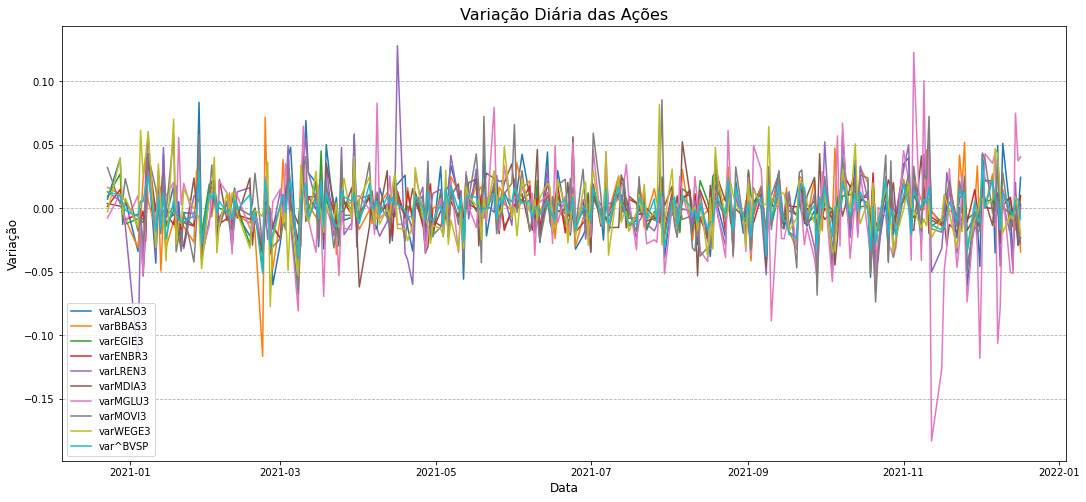

In [36]:
#@title
plt.figure(figsize=(18,8))
plt.plot(stocks_normal_var.index, stocks_normal_var)
plt.title('Variação Diária das Ações', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Variação', fontsize=12)
plt.grid(linestyle='--', axis='y')
plt.legend(stocks_normal_var.columns, loc = "lower left", prop={"size":10})
plt.show()

## c) BoxPlot e Describe das Variações

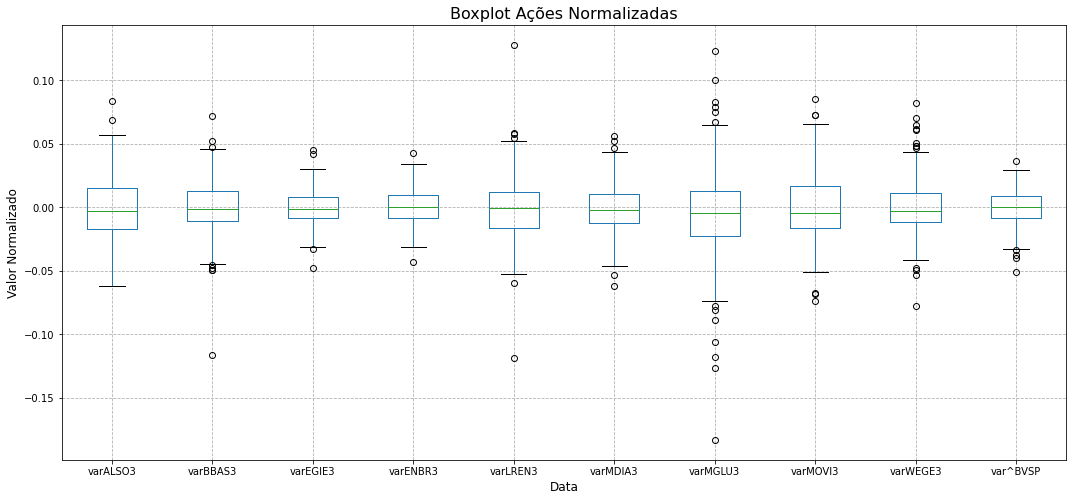

In [16]:
#@title
plt.figure(figsize=(18,8))
plt.title('Boxplot Ações Normalizadas', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor Normalizado', fontsize=12)
plt.grid(linestyle='--')
stocks_normal_var.boxplot()
plt.show()

In [17]:
stocks_normal_var.describe()

,varALSO3,varBBAS3,varEGIE3,varENBR3,varLREN3,varMDIA3,varMGLU3,varMOVI3,varWEGE3,var^BVSP
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,-0.000689,-0.000445,-0.000039,0.000613,-0.001658,-0.000946,-0.004826,-0.000041,0.000104,-0.000244
std,0.024569,0.020287,0.012731,0.013040,0.025168,0.018150,0.034971,0.025270,0.022047,0.013260
min,-0.061939,-0.116457,-0.047512,-0.042680,-0.118679,-0.061889,-0.183150,-0.073684,-0.077278,-0.051201
25%,-0.016858,-0.010543,-0.008280,-0.008091,-0.016100,-0.012409,-0.022882,-0.016081,-0.011830,-0.008295
50%,-0.002817,-0.001491,-0.001063,0.000000,-0.000888,-0.001959,-0.004089,-0.004239,-0.002517,0.000625
75%,0.014882,0.012516,0.007785,0.009379,0.011690,0.010724,0.012646,0.016828,0.010966,0.008555
max,0.083397,0.071700,0.045185,0.043103,0.127988,0.056238,0.122744,0.085470,0.081710,0.036626


# **Cálculo de Beta e R²**

# 6 - Beta (β)

Beta é o fator de variação em relação à B3. É o valor presente na equação da reta quando comparamos uma ação com a B3.

Quanto de variação essa ação vai ter quando a B3 oscila.

    Y = α + βx

    Beta Igual a 1: o ativo em estudo têm a mesma variação que a carteira de mercado
    Beta Maior que 1: o ativo em estudo têm uma variação maior que a carteira de mercado
    Beta Menor que 1: o ativo em estudo têm uma variação menor que a carteira de mercado

https://hcinvestimentos.com/2011/12/20/indice-beta/

## a) Cálculo do Beta (β)

Código baseado em: 
https://medium.com/data-hackers/implementando-regress%C3%A3o-linear-simples-em-python-91df53b920a8

Linear Regression Model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



In [18]:
#@title
# criando variáveis e lista
bolsa_var = stocks_normal_var.columns[-1]
x_v = stocks_normal_var[[bolsa_var]]

lista_stocks_beta = stocks_normal_var.columns
lista_stocks_beta = lista_stocks_beta.drop(lista_stocks_beta[-1])

In [19]:
#@title
from sklearn.linear_model import LinearRegression

lista_beta = []
for asset in lista_stocks_beta:
  y_v = stocks_normal_var[asset]
  calculo = LinearRegression().fit(x_v,y_v)
  calculo_b = calculo.coef_
  lista_beta.append(calculo_b)

beta = pd.DataFrame(lista_beta).transpose()
beta.columns=[lista_stocks_beta.str.replace('var','β_')]
beta

,β_ALSO3,β_BBAS3,β_EGIE3,β_ENBR3,β_LREN3,β_MDIA3,β_MGLU3,β_MOVI3,β_WEGE3
0,1.23935,1.117809,0.551214,0.550762,1.112239,0.602188,1.267374,1.267925,0.79868


## b) Cálculo Beta Alternativo

Maneira alternativa de cálculo do beta sem utilizar métodos prontos.

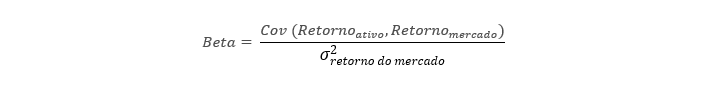


In [20]:
#@title
lista_beta_alt = []

for asset in lista_stocks_beta:
  #teste = (stocks_normal_var[asset].cov(stocks_normal_var['var^BVSP'])) / stocks_normal_var['var^BVSP'].var()
  calculo = (stocks_normal_var[asset].cov(stocks_normal_var.iloc[:,-1])) / stocks_normal_var.iloc[:,-1].var()
  lista_beta_alt.append(calculo)

beta_alt=pd.DataFrame(lista_beta_alt).transpose()
beta_alt.columns=[lista_stocks_beta.str.replace('var','β_')]
beta_alt

,β_ALSO3,β_BBAS3,β_EGIE3,β_ENBR3,β_LREN3,β_MDIA3,β_MGLU3,β_MOVI3,β_WEGE3
0,1.23935,1.117809,0.551214,0.550762,1.112239,0.602188,1.267374,1.267925,0.79868


# 7 - Coeficiente de Determinação R²

O coeficiente é tido como uma medida de confiança como podemos ver na descrição retirada do:

https://blog.minitab.com/pt/analise-de-regressao-como-interpretar-o-r-quadrado-e-avaliar-a-qualidade-de-ajuste

    O R-quadrado é uma medida estatística de quão próximos os dados estão da linha de regressão ajustada. 
    Ele também é conhecido como o coeficiente de determinação ou o coeficiente de determinação múltipla para a regressão múltipla.
    A definição do R-quadrado é bastante simples: é a porcentagem da variação da variável resposta que é explicada por um modelo linear. Ou:
   
    R-quadrado = Variação explicada/Variação total
    O R-quadrado está sempre entre 0 e 100%:
    0% indica que o modelo não explica nada da variabilidade dos dados de resposta ao redor de sua média.
    100% indica que o modelo explica toda a variabilidade dos dados de resposta ao redor de sua média.

    Em geral, quanto maior o R-quadrado, melhor o modelo se ajusta aos seus dados. No entanto, existem condições importantes para esta diretriz.


Ex:
    
    A figura do R2 demonstra quanto dos movimentos de um fundo podem ser explicados pelos movimentos de seu índice de referência.
    Quanto maior o valor do R2, mais próximo o desempenho do fundo pode ser explicado pelo seu índice, enquanto um fundo com um R2 menor não se comporta muito como o seu índice. E quanto maior o R2, mais relevante o valor Beta. 
    Os R2 podem variar de zero, o que significa que não há grau de correlação de desempenho entre uma referência de mercado e um determinado investimento, até 100, o que significa que um investimento está altamente correlacionado com um índice. 
    Não é de surpreender que os fundos indexados tenham um valor de R2 exatamente de 100, ou muito próximo a ele, enquanto um fundo cujos movimentos divergem amplamente de seu índice terá um valor muito baixo de R2.



Desta forma, o mesmo pode ser observado juntamente com o Beta.

## a) Cálculo do R²

In [21]:
#@title
lista_r = []

for asset in lista_stocks_beta:
  y_v = stocks_normal_var[asset]
  calculo = LinearRegression().fit(x_v,y_v)
  calculo = calculo.score(x_v, y_v) # x_v = ^BVSP, declarado anteriormente 
  lista_r.append(calculo)

R_square=pd.DataFrame(lista_r).transpose()
R_square.columns=[lista_stocks_beta.str.replace('var','R²_')]

R_square

,R²_ALSO3,R²_BBAS3,R²_EGIE3,R²_ENBR3,R²_LREN3,R²_MDIA3,R²_MGLU3,R²_MOVI3,R²_WEGE3
0,0.44741,0.533824,0.329621,0.313661,0.343378,0.193553,0.230927,0.442638,0.23075


# 8 - Resultados 

A partir dos resultados podemos tirar algumas conclusões:

    No caso da minha carteira, podemos observar que as ações não possuem grande correlações entre si. Entretanto algumas como EGIE3 e ENBR3 chegam na casa dos 0,7. Ambas são do setor elétrico.
    O IBOVESPA apresenta correlação de 0,73 com a açaõ BBAS3.
    O β é bastante variado, indicando dependências diferentes das ações em relação ao índice, o que aponta uma diversificação dos ativos. A ação BBAS3 é que mais se aproxima de 1, indicando ser a ação que mais acompanha as oscilações do IBOVESPA.
    O R² que mostra quanto dos movimentos de uma ação podem ser explicados pelos movimentos do IBOVESPA também foi bastante variado, e apenas em um caso ultrapassou os 50% (BBAS3), ou seja, 53% da variação dessa ação é explicada pela variação do índice.

Após todos os gráficos, tabelas e análises, concluo que a carteira montada por mim é bem diversificada, com baixa correlação entre os ativos e com dependência variada em relação à B3.

Obs: **Os resultados que comentei são do dia 20/12/2020 à 20/12/2021.**

## a) - Matriz de Correlação

Matriz triangular de correlação da carteira estudada.

    Quanto mais perto de 1, indica uma correlação positiva.
    Quanto mais perto de -1, indica uma correlação negativa.
    Quanto mais próximo de 0, indica a ausência de correlação (nula, dispersa).

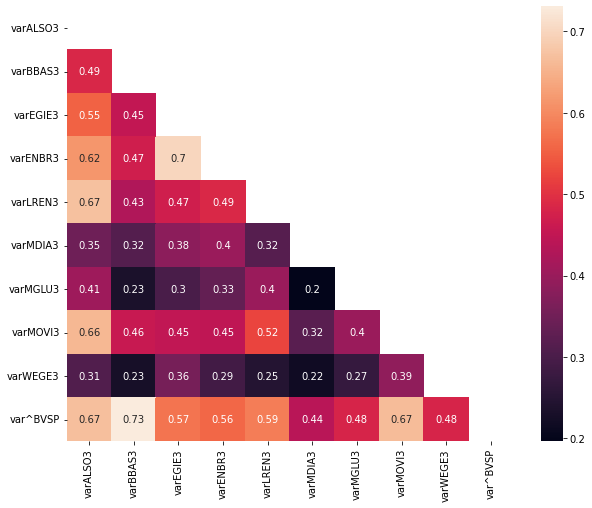

In [22]:
#@title
corrMatrix = stocks_normal_var.corr()
mascara = np.triu(corrMatrix)
plt.rcParams["figure.figsize"] = (10,8)
sn.heatmap(corrMatrix,annot=True, mask=mascara);

## b) Beta (β)



In [23]:
#@title 
beta

,β_ALSO3,β_BBAS3,β_EGIE3,β_ENBR3,β_LREN3,β_MDIA3,β_MGLU3,β_MOVI3,β_WEGE3
0,1.23935,1.117809,0.551214,0.550762,1.112239,0.602188,1.267374,1.267925,0.79868


## c) R_square (R²)

In [24]:
#@title
R_square

,R²_ALSO3,R²_BBAS3,R²_EGIE3,R²_ENBR3,R²_LREN3,R²_MDIA3,R²_MGLU3,R²_MOVI3,R²_WEGE3
0,0.44741,0.533824,0.329621,0.313661,0.343378,0.193553,0.230927,0.442638,0.23075


## c) β e R²

In [25]:
#@title
beta.columns = [(lista_stocks.drop(lista_stocks[-1])).str.replace('β_','')]
R_square.columns = [(lista_stocks.drop(lista_stocks[-1])).str.replace('R²_','')]
beta_r2 = pd.concat([beta,R_square], ignore_index=True)
beta_r2.set_index(pd.Index(['β','R²']))

,ALSO3,BBAS3,EGIE3,ENBR3,LREN3,MDIA3,MGLU3,MOVI3,WEGE3
β,1.23935,1.117809,0.551214,0.550762,1.112239,0.602188,1.267374,1.267925,0.79868
R²,0.44741,0.533824,0.329621,0.313661,0.343378,0.193553,0.230927,0.442638,0.23075


## d) Relação de Risco e Retorno

    #https://www.kaggle.com/kausik123/stocks-analysis-by-regression
    https://www.geeksforgeeks.org/how-to-annotate-matplotlib-scatter-plots/

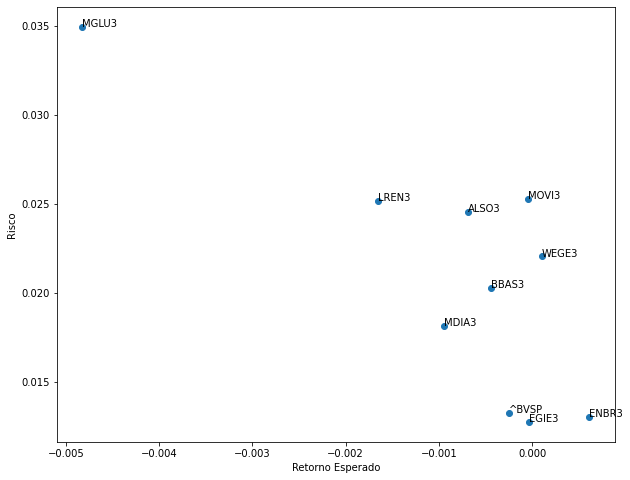

In [26]:
#@title
text = stocks_normal_var.columns.str.replace('var','')
media = stocks_normal_var.mean()
d_v = stocks_normal_var.std()

fig, ax = plt.subplots()
ax.scatter(media,d_v);

for i in range(len(media)):
  plt.annotate(text[i], (media[i], d_v[i]))

plt.xlabel('Retorno Esperado');
plt.ylabel('Risco');

## e) Gráficos de Regressão Linear

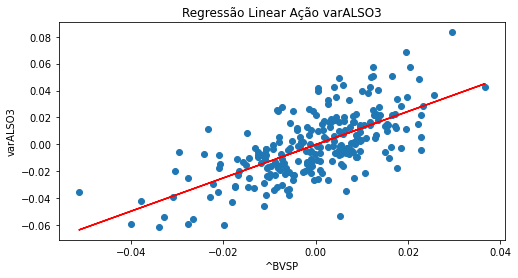

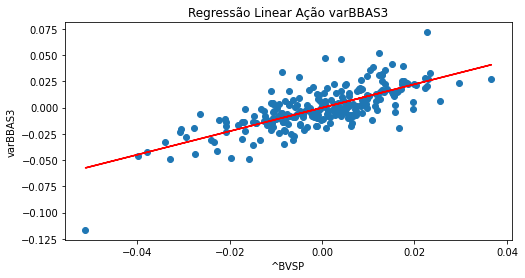

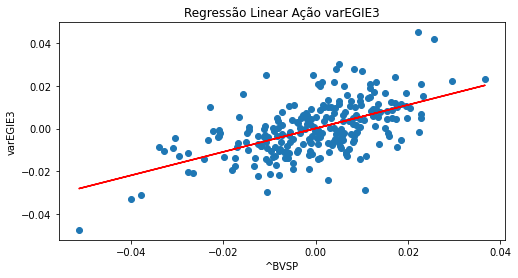

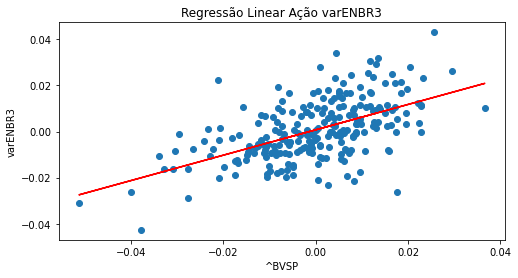

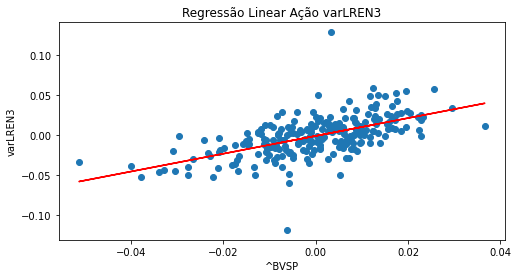

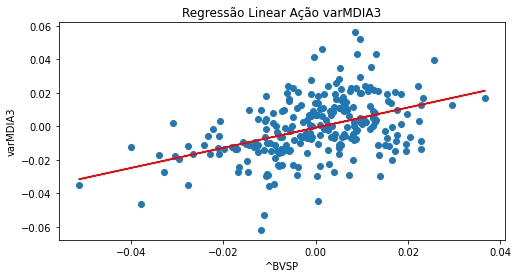

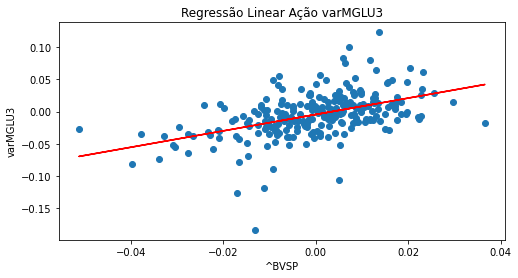

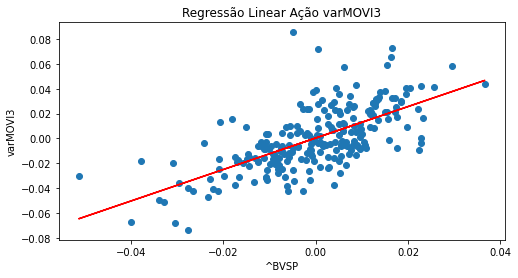

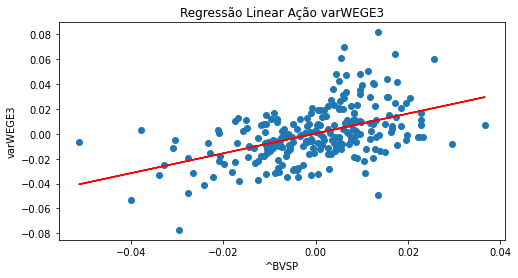

In [27]:
#@title
for asset in lista_stocks_beta:
  y_v = stocks_normal_var[asset]
  calculo = LinearRegression().fit(x_v,y_v)
  plt.figure(figsize=(8,4))
  plt.scatter(x_v,y_v);
  plt.plot(x_v, calculo.predict(x_v), color='red');
  plt.title(f'Regressão Linear Ação {asset}')
  plt.xlabel(stocks_normal.columns[-1])
  plt.ylabel(asset)

  plt.show()

# Extra

## Links para estudo

    https://www.kaggle.com/kausik123/stocks-analysis-by-regression

    https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7

    https://www.linkedin.com/pulse/stock-market-prediction-using-python-article-2-smart-curves-khedkar

## Exemplos Comentados

In [28]:
#sn.heatmap(corrMatrix,annot=True, mask=mascara, cmap='YlGnBu'); # Wistia ou YlGnBu

In [29]:
#plot de correlação entre as a variação diária das ações (demora carregar)
# import seaborn as sns
# sns.pairplot(stocks_normal_var);